<a href="https://colab.research.google.com/github/TCB09/202255202117-Teguh/blob/master/klasifikasi_pohon_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset_path = '/content/drive/MyDrive/dataset'  # Ganti ini

In [3]:

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 998 images belonging to 4 classes.
Found 247 images belonging to 4 classes.


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,868 (40.58 MB)

 Trainable params: 10,636,868 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 344s 11s/step - accuracy: 0.2563 - loss: 3.2267 - val_accuracy: 0.3806 - val_loss: 1.3020
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.4851 - loss: 1.1642 - val_accuracy: 0.3725 - val_loss: 1.4019
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.5946 - loss: 1.0497 - val_accuracy: 0.5142 - val_loss: 1.1329
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.8093 - loss: 0.5977 - val_accuracy: 0.5304 - val_loss: 1.2000
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.9252 - loss: 0.2896 - val_accuracy: 0.6032 - val_loss: 1.1196
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.9717 - loss: 0.1524 - val_accuracy: 0.5587 - val_loss: 1.4457
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.9971 - loss: 0.0608 - val_accuracy: 0.5506 - val_loss: 1.4536
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.9980 - loss: 0.0179 - val_accuracy: 0.5628 - val_los

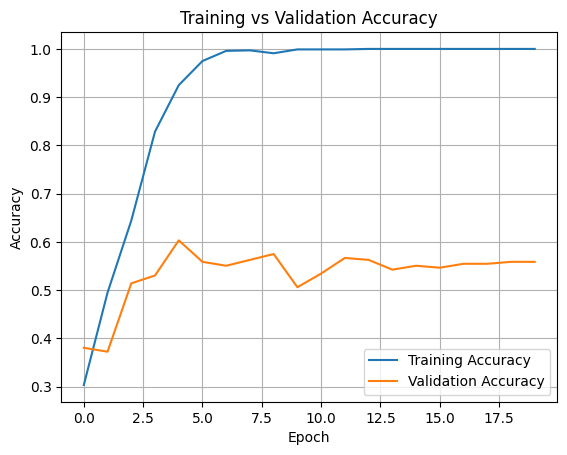

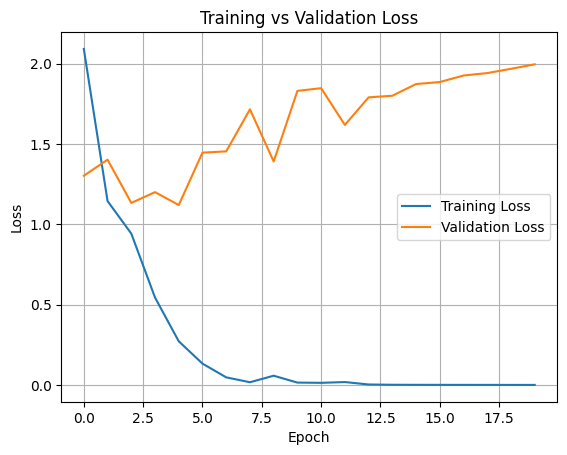

In [7]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.grid(True)
plt.show()


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 814ms/step


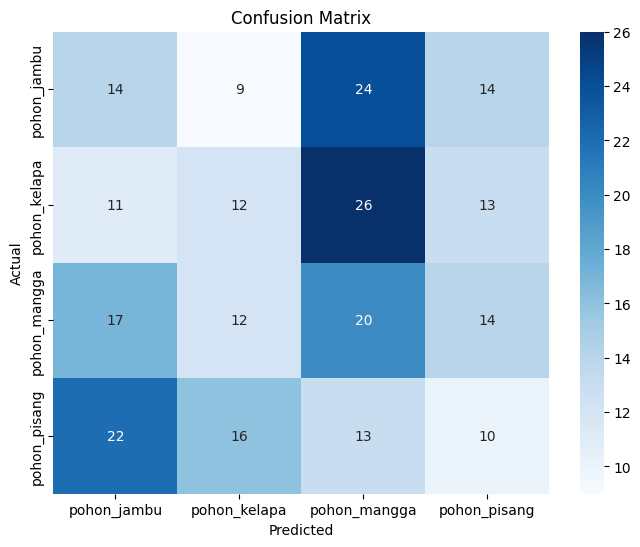

Classification Report:
              precision    recall  f1-score   support

 pohon_jambu       0.22      0.23      0.22        61
pohon_kelapa       0.24      0.19      0.22        62
pohon_mangga       0.24      0.32      0.27        63
pohon_pisang       0.20      0.16      0.18        61

    accuracy                           0.23       247
   macro avg       0.23      0.23      0.22       247
weighted avg       0.23      0.23      0.22       247



In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Ambil label sebenarnya
true_labels = val_data.classes
class_names = list(val_data.class_indices.keys())

# Prediksi
pred_probs = model.predict(val_data)
pred_labels = np.argmax(pred_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=class_names))


In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 648ms/step


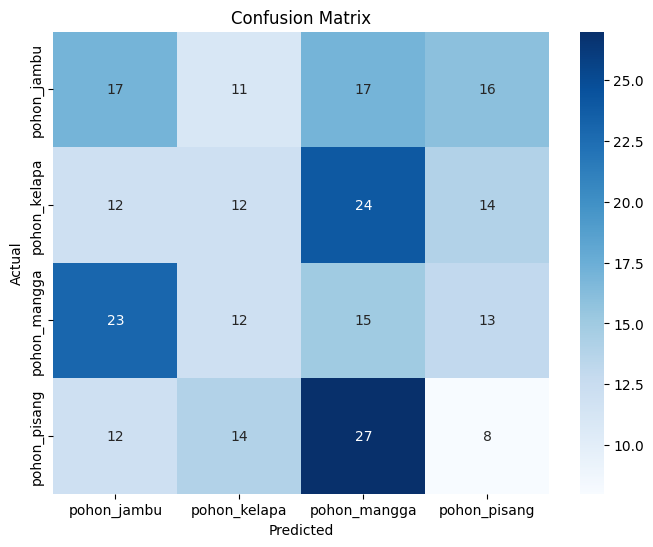

Classification Report:
              precision    recall  f1-score   support

 pohon_jambu       0.27      0.28      0.27        61
pohon_kelapa       0.24      0.19      0.22        62
pohon_mangga       0.18      0.24      0.21        63
pohon_pisang       0.16      0.13      0.14        61

    accuracy                           0.21       247
   macro avg       0.21      0.21      0.21       247
weighted avg       0.21      0.21      0.21       247



In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Ambil label sebenarnya
true_labels = val_data.classes
class_names = list(val_data.class_indices.keys())

# Prediksi
pred_probs = model.predict(val_data)
pred_labels = np.argmax(pred_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=class_names))

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation + Normalisasi
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% data buat validasi
)



In [13]:
import os

# Melihat isi direktori sekarang
print("Isi direktori saat ini:")
print(os.listdir())

# Jika kamu simpan dataset di subfolder, bisa juga jalankan ini untuk eksplorasi:
# os.listdir('nama_folder')


Isi direktori saat ini:
['.config', 'drive', 'sample_data']


In [14]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import os
print(os.listdir('/content/drive/MyDrive'))


['Colab Notebooks', 'dataset']


In [16]:
train_data = datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # ganti ke 'sparse' kalau label-nya bukan one-hot
)


Found 1245 images belonging to 4 classes.


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),  # mencegah overfitting
    Dense(128, activation='relu'),
    Dense(train_data.num_classes, activation='softmax')  # jumlah output disesuaikan otomatis
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)